# Documentation

**Author:** Spencer Ressel

**Created:** June 6th, 2022

*** 
This script plots the space-time power spectrum computed in the 
compute_power_spectrum.py file. 
***

**Inputs:**
* Global resolution, daily timeseries in netCDF format
    - NOAA OLR (Liebmann and Smith 1996)
    - TRMM daily precipitation data
    
**Outputs:**
* Power Spectra including background and raw symmetric and asymmetric 

**Dependencies:**
* compute_power_spectrum.py

# Imports

In [62]:
# Analysis
import os
import numpy as np

# Plotting
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.cm import get_cmap
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
import colormaps as cmaps
from matplotlib import gridspec as gs

# Other
# from compute_power_spectrum import compute_power_spectrum

import sys
sys.path.insert(0, '/home/disk/eos7/sressel/research/thesis-work/python/auxiliary_functions/')
import ipynb.fs.full.mjo_mean_state_diagnostics as mjo
from ipynb.fs.full.power_spectrum_calculator import compute_power_spectrum

# Constants & Parameters

In [67]:
#### Settings and Parameters
# Data
VNAME = {'NOAA':'OLR',
         'TRMM':'PR'}

# Parameters
mask_land = False
plot_raw_spectrum = False
plot_background_spectrum = False
plot_signal_strength = True
save_plots = False
n_smooths = 15

# Times to sample
# tmin = 19980101 #YYYYMMDD
# tmax = 20110101
tmin = '1998-01-01T00:00:00.000000000'
tmax = '2011-01-01T00:00:00.000000000'
# tmin = 19790601
# tmax = 20110101

trange = str(tmin)[:4] + '-' +str(tmax)[:4]
time_limits = (tmin, tmax)

# Latitude range
max_latitude = 15 # max latitude for pr spectrum (WK1999)

# Data resolution in longitude and time (good for TRMM and NOAA OLR)
Fs_lon = 1/2.5 # longitudinal resolution is 2.5 deg
Fs_time = 1 # 1 means 1 day (daily data)

# Run Code

In [3]:
dataset = 'NOAA'
x,y,spectra= compute_power_spectrum(dataset, time_limits, max_latitude, 
                          Fs_time, Fs_lon, 
                          mask_land=mask_land, n_smooths=n_smooths)

raw_symmetric_power =       spectra[0]
raw_asymmetric_power =      spectra[1]
background_spectrum =       spectra[2]
symmetric_power_spectrum =  spectra[3]
asymmetric_power_spectrum = spectra[4]

Loading Data
 → Dataset: NOAA
data downsampled
Calculating space-time spectra
1-2-1 Filtering background


# Plotting

Plotting symmetric signal
Plotting asymmetric signal


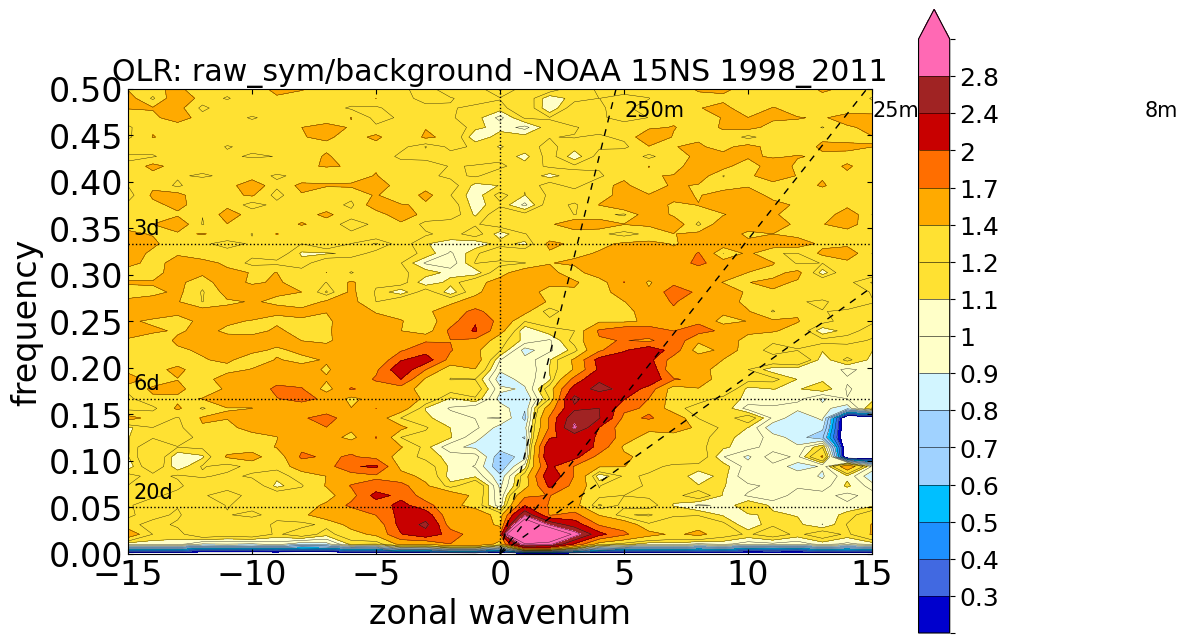

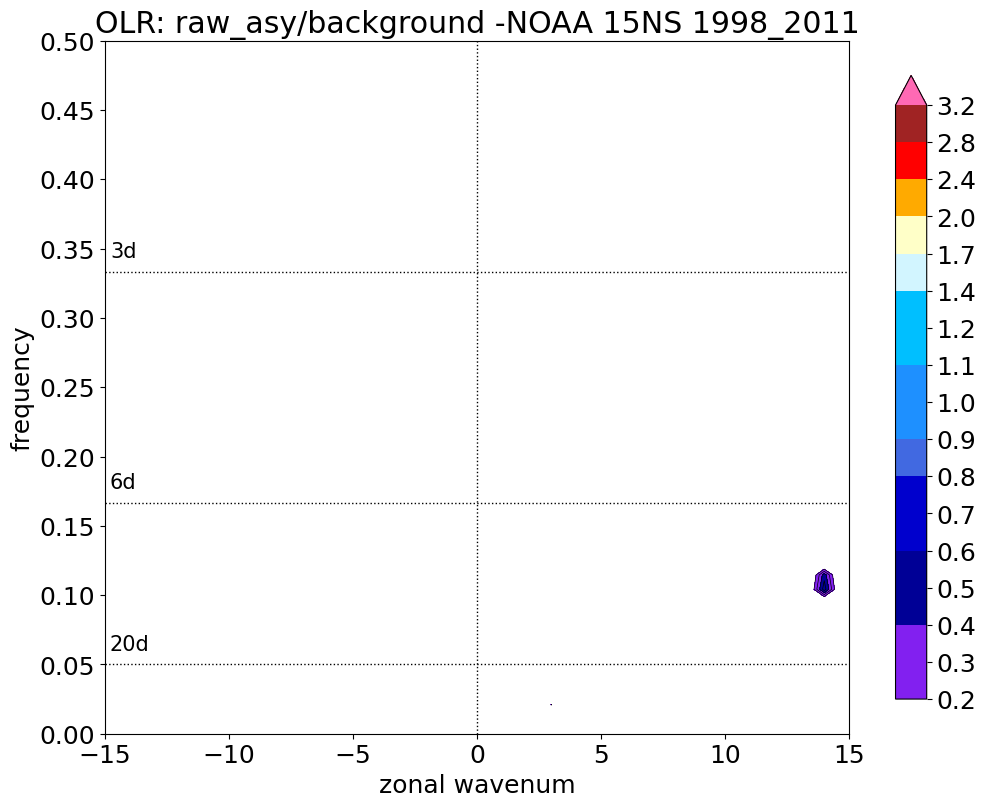

In [12]:
# Plotting parameters
g = 9.8 # m/s^2
eq_depth = np.array([8,25,250]) # Equivalent Depths (m)
plot_days = np.array([3,6,20]) # mark 3, 6, 20 day in WK1999
earth_radius = 6371*1000 # Earth radius (m)

# Create a directory for the output figures
# dir_out = "C:/Users/resse/OneDrive/UW/Research/Figures/"
dir_out = "/home/disk/eos7/sressel/research/thesis-work/python/mjo_data_analysis/output/"
fig_dir = dir_out + 'Power Spectra/' + dataset + '/'

if not os.path.exists(fig_dir):    
    print('Creating figure directory')
    print('======================')
    os.mkdir(fig_dir)        

plt.rcParams.update({'font.size':24})
# Plot raw spectrum
if plot_raw_spectrum == True:
    print('Plotting raw spectrum')
    print('======================')
    
    # Plot symmetric spectrum
    plt.figure(figsize=(12,9))  
    plt.rcParams.update({'font.size': 18})
    contour_levels = np.arange(-1,0.1,0.1)
    plt.contourf(x, y, np.log10(raw_symmetric_power),
                 cmap=get_cmap('hot_r'),levels=contour_levels,
                 extend='both') 
    
    cb = plt.colorbar(orientation = 'vertical',shrink=.9)
    cb.set_ticks(contour_levels)
    plt.title(
      VNAME[dataset]+' sym (log): '+ dataset +' '+str(max_latitude)+'NS '+trange)
    plt.ylabel('frequency')
    plt.xlabel('zonal wavenum')
    plt.axis([-15,15,0,0.5])
    plt.xticks([-15,-10,-5,0,5,10,15])
    plt.yticks(np.arange(0,0.55,0.05))
    if save_plots == True:
        plt.savefig(
             fig_dir + VNAME[dataset] + '_sym_' + dataset + '_' + str(max_latitude) + 'NS.png') 
        plt.close()

    # Plot asymmetric spectrum
    plt.figure(figsize=(12,9))       
    plt.rcParams.update({'font.size': 18})
    plt.contourf(x,y,np.log10(raw_asymmetric_power),
                 cmap=get_cmap('hot_r'),levels = contour_levels,
                 extend='both') 
    
    cb = plt.colorbar(orientation = 'vertical',shrink=.9)
    cb.set_ticks(contour_levels)
    plt.title(
      VNAME[dataset]+' asy (log): '+dataset+' '+str(max_latitude)+'NS '+trange)
    plt.ylabel('frequency')
    plt.xlabel('zonal wavenum')
    plt.axis([-15,15,0,0.5])
    plt.xticks([-15,-10,-5,0,5,10,15])
    plt.yticks(np.arange(0,0.55,0.05))
    if save_plots == True:
        plt.savefig(
             fig_dir+VNAME[dataset]+'_asy_'+dataset+'_'+str(max_latitude)+'NS.png') 
        plt.close()

# Plot background spectrum
if plot_background_spectrum == True:
    print('Plotting background spectrum')
    print('======================')
    
    # Plot background spectrum-smooth (sym-asy mixed)
    plt.figure(figsize=(12,9))
    contour_levels = np.arange(-1,0.1,0.1)
    plt.contourf(x,y,np.log10(background_spectrum),
                 cmap=get_cmap('hot_r'),
                 levels = contour_levels,
                 extend='both') 
    cb = plt.colorbar(orientation = 'vertical',shrink=.9)
    cb.set_ticks(contour_levels)
    plt.title(VNAME[dataset] + ' (sym+asy)/2: smooth (log) -' +\
                                     dataset + ' ' + str(max_latitude) + 'NS ' + trange)
    plt.ylabel('frequency')
    plt.xlabel('zonal wavenum')
    plt.axis([-15,15,0,0.5])
    plt.xticks([-15,-10,-5,0,5,10,15])
    plt.yticks(np.arange(0,0.55,0.05))
    if save_plots == True:
        plt.savefig(fig_dir+VNAME[dataset]+\
         '_background_' + str(n_smooths) + 'cyc_smooth_' + str(max_latitude) + 'NS.png') 
        plt.close()

# Plot signal strength
if plot_signal_strength == True:
    print('Plotting symmetric signal')
    print('======================')
    
    # #color_map = cm.get_cmap('afmhot_r')
    # cbar_dir =\
    #     r"C:\Users\resse\OneDrive\UW\Research\Color Maps/"
    # with open(
    #    cbar_dir+'Chen2022_power_spectrum_colorbar.csv', newline='') as csvfile:
    #     reader = csv.reader(
    #                       csvfile, delimiter=',', quoting=csv.QUOTE_NONNUMERIC)
    #     color_list = list(reader)
    # color_map = colors.ListedColormap(color_list, name='Chen2022')
    color_map = cmaps.amwg_blueyellowred
    
    if dataset == 'NOAA':
        # contour_levels = np.arange(0,3.1,0.1)
        contour_levels = np.array([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.4,1.7,2,2.4,2.8,3.2])
        # contour_levels = np.arange(0,3.2,0.4)
    elif dataset == 'TRMM':
        contour_levels = np.arange(0,3.1,0.1) 
    
    # Plot symmetric signal strength
    plt.figure(figsize=(12,9))  
    cf = plt.contourf(x, y, symmetric_power_spectrum, 
                      cmap = color_map, levels = contour_levels,
                      norm = mcolors.PowerNorm(gamma=0.5), extend='max')
    plt.rcParams.update({'font.size': 18})
    cb = plt.colorbar(orientation = 'vertical',shrink=.9, drawedges=True)
    # cb = plt.colorbar(orientation = 'horizontal',shrink=.9)
    cb.set_ticks(np.array([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.4,1.7,2,2.4,2.8,3.2]))
    cb.set_ticklabels(["","0.3","0.4","0.5","0.6","0.7","0.8","0.9",
                  "1","1.1","1.2","1.4","1.7","2","2.4","2.8",""])
    plt.contour(cf, colors='black',linewidths=0.25)
    
    # Mark 3, 6, 20 day period:
    for day in plot_days:
        plt.axhline(1/day, color='black', lw=1, ls=':')
        plt.text(-14.8, 1/day+0.01, str(day) + 'd', fontsize=15)
       
    # Mark CCKW dispersion relationship:
    yloc = np.array([0.47,0.47,0.47])
    cp = (g*eq_depth)**0.5*86400 # seconds to days
    zwnum_goal = 2*np.pi*earth_radius*0.5/cp
    for hh in range(0,np.size(eq_depth)):
        plt.plot([0,zwnum_goal[hh]],[0,0.5],'k',
                 linewidth=1,linestyle=(0,(5,5)))            
        plt.text(np.around(zwnum_goal)[hh],yloc[hh],
                 (str(eq_depth[hh]) + 'm'), fontsize=15)               
    
    # Mark zonal wavenumber 0:
    plt.axvline(x=0,color='black',lw=1,ls=':')        
    
    # Plot Labelling
    plt.title(VNAME[dataset]+': raw_sym/background -'+\
              dataset+' '+str(max_latitude)+'NS '+trange)
    plt.ylabel('frequency')
    plt.xlabel('zonal wavenum')
    plt.axis([-15,15,0,0.5])
    plt.xticks([-15,-10,-5,0,5,10,15])
    plt.yticks(np.arange(0,0.55,0.05))
    plt.tick_params(bottom=True,top=True,left=True,right=True)
    plt.tick_params(labelbottom=True,labeltop=False,
                    labelleft=True,labelright=False)
    plt.tick_params(direction="in")
    plt.gca().set_aspect(30/0.8)
    
    # Save the figure as a png
    if save_plots == True:
        plt.savefig(fig_dir+VNAME[dataset]+\
                    '_ratio_sym_'+str(max_latitude)+'NS_purplebox.png')
        plt.close()
    
    # Plot asymmetric signal strength
    print('Plotting asymmetric signal')
    print('======================')
    plt.figure(figsize=(12,9))
    plt.rcParams.update({'font.size': 18})
    cf = plt.contourf(x,y,np.log10(asymmetric_power_spectrum),
                      cmap=color_map,
                      levels = contour_levels,
                      extend='max') 
    cb = plt.colorbar(orientation = 'vertical',shrink=.9)
    cb.set_ticks(contour_levels)
    plt.contour(cf, colors='k',linewidths=0.5)
    
    # Mark 3, 6, 20 day period:
    for day in plot_days:
        plt.axhline(y=1/day,color='k',lw=1, ls=':')
        plt.text(-14.8, 1/day+0.01, str(day) + 'd', fontsize=15)
    
    # Mark zonal wavenumber == 0:
    plt.axvline(x=0, color='k', lw=1, ls=':')    
    
    # Plot labelling
    plt.title(VNAME[dataset]+\
              ': raw_asy/background -' +\
                  dataset + ' ' + str(max_latitude) + 'NS ' + trange)
    plt.ylabel('frequency')
    plt.xlabel('zonal wavenum')
    plt.axis([-15,15,0,0.5])
    plt.xticks([-15,-10,-5,0,5,10,15])
    plt.yticks(np.arange(0,0.55,0.05))
    
    # Save figure as png
    if save_plots == True:
        plt.savefig(fig_dir+VNAME[dataset]+'_ratio_asy_'+str(max_latitude)+'NS.png')                      
        plt.close()

Plotting symmetric signal


/tmp/ipykernel_1096208/1683275044.py:24: UserWarning: Log scale: values of z <= 0 have been masked
  cf = ax.contourf(


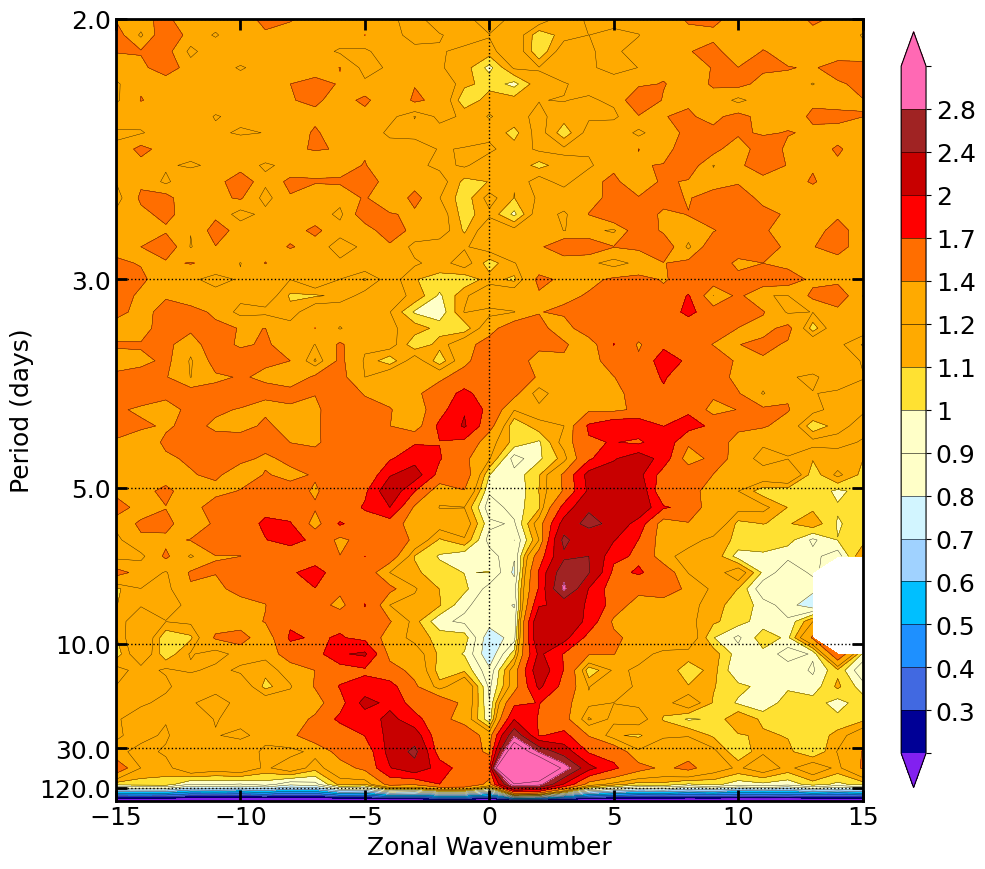

In [122]:
print('Plotting symmetric signal')
print('======================')

color_map = cmaps.amwg_blueyellowred

# contour_levels = np.arange(0,3.1,0.1)
contour_levels = np.array([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.4,1.7,2,2.4,2.8,3.2])
# contour_levels = np.arange(0,3.2,0.4)

# Plot symmetric signal strength
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(9,9))  
ax.set_title(
    f"log({VNAME[dataset]}): Symmetric/Background \n"
    + f"{max_latitude}°S-{max_latitude}°N, {trange}",
    pad=15
)
gs_main = gs.GridSpec(60, 2, width_ratios=[30,1])
gs_main.update(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.1)

ax = fig.add_subplot(gs_main[:, 0])
cbar_ax = fig.add_subplot(gs_main[2:-2, 1])

cf = ax.contourf(
    x, 
    2*np.pi*y, 
    symmetric_power_spectrum, 
    cmap = color_map,
    levels = contour_levels,
    # norm = mcolors.PowerNorm(gamma=0.5), 
    norm = mcolors.LogNorm(),
    extend='both'
)

cb = fig.colorbar(cf, cax=cbar_ax, orientation = 'vertical',shrink=.9, drawedges=True)
cb.set_ticks(np.array([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.4,1.7,2,2.4,2.8,3.2]))
cb.set_ticklabels(["","0.3","0.4","0.5","0.6","0.7","0.8","0.9","1","1.1","1.2","1.4","1.7","2","2.4","2.8",""])
ax.contour(cf, colors='black',linewidths=0.25)

# plot_days = [3,6,20]
# Mark 3, 6, 20 day period:
# for day in plot_days:
#     ax.axhline(2*np.pi/day, color='black', lw=1, ls=':')
#     ax.text(-14.8, 2*np.pi/day+0.01, str(day) + 'd', fontsize=15)
   
# Mark zonal wavenumber 0:
ax.axvline(x=0,color='black',lw=1,ls=':')        

# Plot Labelling
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
    
ax.tick_params(axis='both', width=2, length=8, right=True, top=True)
ax.set_xlabel('Zonal Wavenumber')
# plt.axis([-15,15,0,0.5])
ax.set_xlim(-15,15)
ax.set_ylim(0, 3)
ax.set_xticks(np.arange(-15, 15+5, 5))
# ax.set_yticks(np.arange(0.0,3+0.5,0.5))
tick_locs = [2*np.pi/120, 2*np.pi/30, 2*np.pi/10, 2*np.pi/5, 2*np.pi/3, 2*np.pi/2]
tick_labels = [str(2*np.pi/tick_loc) for tick_loc in tick_locs]
ax.set_yticks(ticks=tick_locs, labels=tick_labels)
ax.set_ylabel('Period (days)')
ax.grid(True, axis='y', color='black',lw=1,ls=':')
# ax.set_ylabel(r'Frequency (day$^{-1}$)', labelpad=15)
# ax.yaxis.set_major_locator(mticker.MaxNLocator(nbins=6, prune='lower'))

ax.tick_params(direction="in")
ax.set_aspect(30/3)

plt.show()
# # Save the figure as a png
# if save_plots == True:
#     plt.savefig(fig_dir+VNAME[dataset]+\
#                 '_ratio_sym_'+str(max_latitude)+'NS.png')
#     plt.close()